In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D, GRU
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [21]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

In [22]:
#단어수 맞추기
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [23]:
#모델 구조 설정
# model = Sequential()
# model.add(Embedding(5000, 500))
# model.add(Dropout(0.5))
# model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
# model.add(MaxPooling1D(pool_size=4))
# model.add(LSTM(55))
# # model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
# # model.add(MaxPooling1D(pool_size=4))
# # model.add(LSTM(55))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))

model = Sequential()
model.add(Embedding(5000, 500))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(GRU(55, return_sequences=True))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [24]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 500)         2500000   
                                                                 
 dropout_7 (Dropout)         (None, None, 500)         0         
                                                                 
 conv1d_8 (Conv1D)           (None, None, 64)          160064    
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, None, 64)          0         
 g1D)                                                            
                                                                 
 gru_1 (GRU)                 (None, None, 55)          19965     
                                                                 
 lstm_7 (LSTM)               (None, 55)                24420     
                                                      

In [25]:
#모델 실행 옵션
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [26]:
#학습 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [27]:
#모델 실행
history = model.fit(X_train, y_train, batch_size=40, epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stopping_callback])

Epoch 1/100
469/469 [==============================] - 47s 92ms/step - loss: 0.3796 - accuracy: 0.8217 - val_loss: 0.2608 - val_accuracy: 0.8912
Epoch 2/100
469/469 [==============================] - 24s 50ms/step - loss: 0.2138 - accuracy: 0.9179 - val_loss: 0.2755 - val_accuracy: 0.8861
Epoch 3/100
469/469 [==============================] - 18s 39ms/step - loss: 0.1434 - accuracy: 0.9497 - val_loss: 0.3030 - val_accuracy: 0.8883
Epoch 4/100
469/469 [==============================] - 15s 31ms/step - loss: 0.1024 - accuracy: 0.9646 - val_loss: 0.3517 - val_accuracy: 0.8864
Epoch 5/100
469/469 [==============================] - 14s 29ms/step - loss: 0.0651 - accuracy: 0.9792 - val_loss: 0.3910 - val_accuracy: 0.8835
Epoch 6/100
469/469 [==============================] - 14s 29ms/step - loss: 0.0503 - accuracy: 0.9834 - val_loss: 0.4442 - val_accuracy: 0.8800


## 결과 시각화

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
  plt.legend()
plt.show()

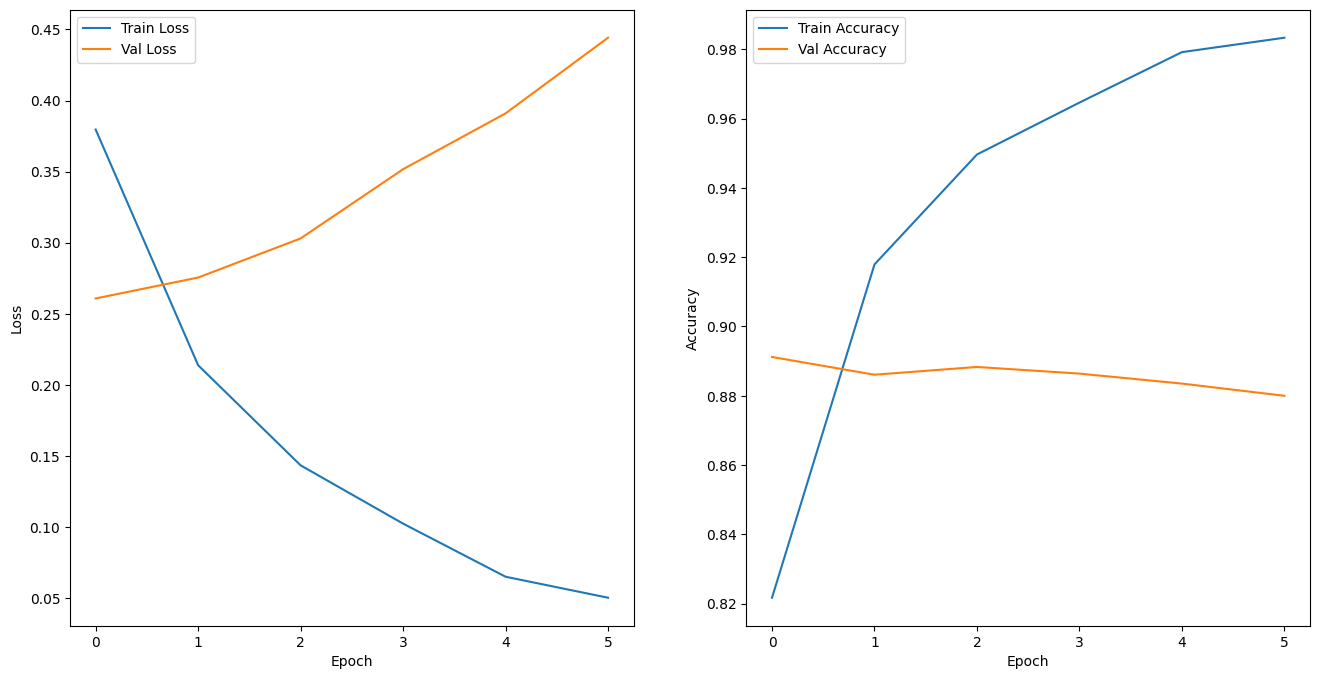

In [29]:
plot_history(history)

## 증권데이터


In [1]:
!pip install finance-datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.6/46.6 kB 331.9 kB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

In [7]:
import FinanceDataReader as fdr

samsung = fdr.DataReader('005930')
samsung.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2000-03-10,5790,5800,5520,5540,572199,NaN
2000-03-13,5480,5490,5160,5180,644358,-0.064982
2000-03-14,5170,5380,5160,5210,601241,0.005792
2000-03-15,5200,5400,5120,5400,922141,0.036468
2000-03-16,5480,5520,5360,5400,575981,0.000000


In [5]:
apple = fdr.DataReader('AAPL')
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600


In [6]:
ford = fdr.DataReader('F', '1990-01-01', '2024-12-30')
ford.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,7.983336,8.257051,7.937717,8.257051,2.339107,6241908
1990-01-03,8.302670,8.371098,8.257051,8.302670,2.352029,8032278
1990-01-04,8.325479,8.348289,8.234241,8.302670,2.352029,3932566
1990-01-05,8.302670,8.348289,8.188622,8.188622,2.319721,3820771
1990-01-08,8.165813,8.211432,8.120194,8.188622,2.319721,3360985
